In [ ]:
#import library
import json
from nltk.stem import WordNetLemmatizer
import nltk
import pickle
import numpy as np
import random
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.models import load_model
from keras.layers import Dense, Dropout
from keras import callbacks 

In [ ]:
with open('/content/sample_data/dataset.json') as json_data:
  intents=json.load(json_data)

In [ ]:
intents

{'intents': [{'context': [''],
   'patterns': ['hai', 'halo', 'tes', 'cek', 'hi', 'Hello', 'permisi'],
   'responses': ['hai', 'iya', 'ada yang bisa saya bantu?', 'halo', 'monggo'],
   'tag': 'sapaan'},
  {'context': [''],
   'patterns': ['Assalamualaikum'],
   'responses': ['Waalaikum Salam Warrahmatullahi Wabarakatuh'],
   'tag': 'salam'},
  {'context': [''],
   'patterns': ['terimakasih',
    'sangat membantu',
    'terimakasih untuk informasinya'],
   'responses': ['sama-sama',
    'senang bisa membantu anda',
    'dengan senang hati'],
   'tag': 'terimakasih'},
  {'context': [''],
   'patterns': [],
   'responses': ['maaf saya tidak bisa memahami kata-kata anda',
    'maaf bisa diulangi lagi pertanyaannya',
    'anda belum memberi pertanyaan'],
   'tag': ''},
  {'context': [''],
   'patterns': ['Apa yang bisa kamu lakukan?'],
   'responses': ['Saya bisa membantu anda untuk menjawab beberapa perntanyaan tentang  informasi akademik'],
   'tag': 'tanya'},
  {'context': [''],
   'patt

In [ ]:
Lm = WordNetLemmatizer()

nltk.download('omw-1.4')
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
abai_kata=["?","!","."]
kata=[]
doc=[]
kelas=[]
file_dataset=open("/content/sample_data/dataset.json").read()
dataset=json.loads(file_dataset)

In [ ]:
for data in dataset["intents"]:
    for pertanyaan in data["patterns"]:

    #mengambil setiap kalimat dalam dataset untuk di tokenisasi menjadi kata-kata
     token= nltk.word_tokenize(pertanyaan)
     kata.extend(token)
     #menambahkan kalimat yang telah ditokenisasi ke dalam variabel array doc
     doc.append((token,data["tag"]))

     #menambahkan tag ke dalam array kelas
     if data["tag"] not in kelas:
         kelas.append(data["tag"])


In [ ]:
kata

['hai',
 'halo',
 'tes',
 'cek',
 'hi',
 'Hello',
 'permisi',
 'Assalamualaikum',
 'terimakasih',
 'sangat',
 'membantu',
 'terimakasih',
 'untuk',
 'informasinya',
 'Apa',
 'yang',
 'bisa',
 'kamu',
 'lakukan',
 '?',
 'dimana',
 'letak',
 'kampus',
 'IST',
 'AKPRIND',
 'letak',
 'kampus',
 'Apakah',
 'IST',
 'AKPRIND',
 'perguruan',
 'tinggi',
 'negeri',
 'atau',
 'swasta',
 'status',
 'Alasan',
 'memilih',
 'IST',
 'AKPRIND',
 'alasan',
 'bagaimana',
 'cara',
 'melakukan',
 'pendaftaran',
 'ulang',
 '?',
 'daftar',
 'ulang',
 'IST',
 'AKPRIND',
 'ada',
 'berapa',
 'kampus',
 'jumlah',
 'kampus',
 'dimana',
 'kita',
 'bisa',
 'melihat',
 'Berita',
 'terkini',
 '(',
 'seperti',
 'jadwal',
 'Webinar',
 ',',
 'Event-event',
 'tertentu',
 ')',
 ',',
 'dan',
 'juga',
 'pengisian',
 'KRS',
 'berita',
 'dapat',
 'informasi',
 'darimana',
 'Dimana',
 'kita',
 'bisa',
 'mengetahui',
 'informasi',
 'terkait',
 'KRS',
 '?',
 'informasi',
 'krs',
 'bagaimana',
 'cara',
 'mengetahui',
 'informasi'

In [ ]:
kata=[Lm.lemmatize(token.lower())for token in kata if token not in abai_kata]

#set kata yang telah di lemmatisasi
kata=sorted(list(set(kata)))
kelas=sorted(list(set(kelas)))

#menyimpan data
pickle.dump(kata,open("kata.pkl","wb"))
pickle.dump(kelas,open("kelas.pkl","wb"))

train=[]
output_kosong=[0]*len(kelas)

for d in doc:
    bag=[]
    #daftar kata-kata tokenized untuk pola
    pola_kata=d[0]
    # lemmatize setiap  kata dasar, dalam upaya untuk mewakili kata-kata terkait
    pola_kata = [Lm.lemmatize(word.lower()) for word in pola_kata]
    #buat kumpulan kata-kata  dengan angka 1, jika kecocokan kata ditemukan dalam pola saat ini
    for k in kata:
        bag.append(1) if k in pola_kata else bag.append(0)
    # output adalah '0' untuk setiap tag dan '1' untuk tag saat ini (untuk setiap pola)
    output_baris=list(output_kosong)
    output_baris[kelas.index(d[1])] = 1

    train.append([bag,output_baris])

In [ ]:
kelas


['akreditasi',
 'alasan',
 'beasiswa',
 'berita',
 'biaya',
 'biaya_remedial',
 'cara_ikut_ukm',
 'cumlaude',
 'cuti_kuliah',
 'daftar_ulang',
 'dispensasi',
 'entry_krs',
 'informasi_krs',
 'informasi_mata_kuliah',
 'ip',
 'ipk',
 'jadwal_ujian',
 'jalur_beasiswa',
 'jumlah_kampus',
 'kontak',
 'konversi',
 'krs_adalah',
 'letak_kampus',
 'nilai',
 'nilai_max_remdial',
 'nomor_rekening',
 'perlombaan',
 'pin',
 'praktikum',
 'prakuliah',
 'remedial',
 'ruang_alumni',
 'salam',
 'sapaan',
 'sasidiwa',
 'skpi',
 'sks',
 'status',
 'syarat_cuti_kuliah',
 'syarat_mata_kuliah',
 'syarat_sks',
 'tanya',
 'tentang',
 'terimakasih',
 'tidak_bayar',
 'ukm',
 'uts']

In [ ]:
from sklearn.preprocessing import LabelEncoder # encode label nilai kategorik menjadi nilai numerik
label= LabelEncoder().fit_transform(kelas) # encode label menjadi nilai numerik
label

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

In [ ]:
# acak fitur  dan ubah menjadi np.array
random.shuffle(train)
training = np.array(train)
# buat list training dan tes. X - patterns, Y - intents
train_x = list(training[:, 0])
train_y = list(training[:, 1])
print("Data pelatihan dibuat")

Data pelatihan dibuat


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(len(train_y))

103


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(1024, input_shape=(len(train_x[0]),), activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation="softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              172032    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 47)                24111     
                                                                 
Total params: 720,943
Trainable params: 720,943
Non-trainable params: 0
_________________________________________________________________


In [ ]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])

# earlystopping = callbacks.EarlyStopping(monitor ="loss", mode ="min", patience = 5, restore_best_weights = True)
# callbacks =[earlystopping]
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1,validation_split=0.3)
model.save("chatbot_model1.h5", hist)
print("model telah telah terbuat")


Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


15/15 [==============================] - 1s 21ms/step - loss: 3.8437 - accuracy: 0.0000e+00 - val_loss: 3.8745 - val_accuracy: 0.0000e+00
Epoch 2/200
15/15 [==============================] - 0s 8ms/step - loss: 3.7776 - accuracy: 0.0694 - val_loss: 3.9099 - val_accuracy: 0.0323
Epoch 3/200
15/15 [==============================] - 0s 9ms/step - loss: 3.6469 - accuracy: 0.1944 - val_loss: 3.9528 - val_accuracy: 0.0323
Epoch 4/200
15/15 [==============================] - 0s 8ms/step - loss: 3.5029 - accuracy: 0.2639 - val_loss: 4.0236 - val_accuracy: 0.0323
Epoch 5/200
15/15 [==============================] - 0s 8ms/step - loss: 3.3364 - accuracy: 0.2778 - val_loss: 4.0910 - val_accuracy: 0.0323
Epoch 6/200
15/15 [==============================] - 0s 9ms/step - loss: 3.1691 - accuracy: 0.3194 - val_loss: 4.1809 - val_accuracy: 0.0323
Epoch 7/200
15/15 [==============================] - 0s 8ms/step - loss: 3.0123 - accuracy: 0.2917 - val_loss: 4.3026 - val_accuracy: 0.0323
Epoch 8/200
15/1

In [ ]:
loss, acc = model.evaluate(train_x, train_y, verbose=0)


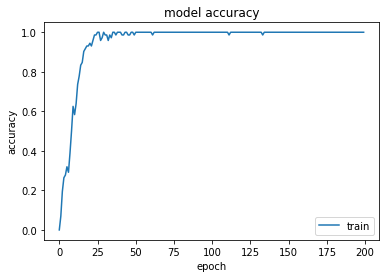

In [ ]:
from matplotlib import pyplot
# plot learning curves
pyplot.title('model accuracy')
pyplot.xlabel('epoch')
pyplot.ylabel('accuracy')
pyplot.plot(hist.history['accuracy'], label='train')
# pyplot.plot(hist.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

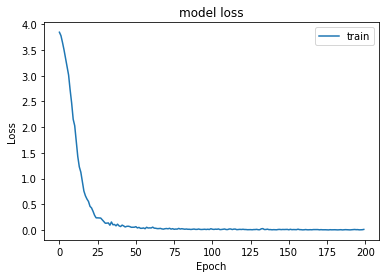

In [ ]:
from matplotlib import pyplot
# plot learning curves
pyplot.title('model loss')
pyplot.xlabel('Epoch')
pyplot.ylabel('Loss')
pyplot.plot(hist.history['loss'], label='train')
pyplot.legend()
pyplot.show()

In [ ]:
# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.810


In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
classifier_tree = DecisionTreeClassifier()
y_predict = classifier_tree.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_test

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

In [ ]:
y_predict

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
    

In [ ]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1
           2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
 
def to_target(x):
    """Map targets to target names"""   
    return list(dataset.target_names)[x]
 


In [ ]:
# Load data
dataset = load_breast_cancer()
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)
df['target_names'] = df['target'].apply(to_target)
 
 
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_names
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,malignant


In [ ]:
# Define predictor and predicted datasets
X = df.drop(['target','target_names'], axis=1).values
y = df['target_names'].values

In [ ]:
# split taining and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
 
# train the model
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
 
# compute accuracy of the model
knn.score(X_test, y_test)
 
# compute the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      benign       0.90      0.99      0.94       107
   malignant       0.98      0.81      0.89        64

    accuracy                           0.92       171
   macro avg       0.94      0.90      0.92       171
weighted avg       0.93      0.92      0.92       171



In [ ]:
import pandas as pd
df2 = pd.read_json('/content/sample_data/data.json')
df2

,tag,patterns,responses,context
0,sapaan,"[hai, halo, tes, cek, hi, Hello, permisi]","[hai, iya, ada yang bisa saya bantu?, halo, mo...",[]
1,salam,[Assalamualaikum],[Waalaikum Salam Warrahmatullahi Wabarakatuh],[]
2,terimakasih,"[terimakasih, sangat membantu, terimakasih unt...","[sama-sama, senang bisa membantu anda, dengan ...",[]
3,,[],"[maaf saya tidak bisa memahami kata-kata anda,...",[]
4,tanya,[Apa yang bisa kamu lakukan?],[Saya bisa membantu anda untuk menjawab bebera...,[]
5,letak_kampus,"[dimana letak kampus IST AKPRIND, letak kampus]","[IST AKPRIND beralamat di Kompleks, Jl. Kalisa...",[]
6,status,[Apakah IST AKPRIND perguruan tinggi negeri at...,[IST AKPRIND adalah perguruan tinggi swasta ya...,[]
7,alasan,"[Alasan memilih IST AKPRIND, alasan]",[banyak jalur masuk yang menawarkan beasiswa a...,[]
8,daftar_ulang,"[bagaimana cara melakukan pendaftaran ulang ?,...",[datang ke kampus 1 IST AKPRIND di bagian Biro...,[]
9,jumlah_kampus,"[IST AKPRIND ada berapa kampus, jumlah kampus]",[IST AKPRIND mempunyai 3 kampus yaitu: kampus ...,[]


In [ ]:
# Define predictor and predicted datasets
X = df2.drop(['tag'], axis=1).values
y = df2['tag'].values
 

In [ ]:
x1=X.reshape(-1,1)
x2=y.reshape(-1,1)
X= LabelEncoder().fit_transform(x1)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


TypeError: ignored

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries and modules for Machine Learning
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# Libraries and modules for model evaluation
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Create a Support Vector Machine object.
svm = SVC()
# Fit the model to the train set.
svm.fit(np.array(X_train), np.array(y_train))
# Predict the classes on the test set.
y_predict = svm.predict(X_test)